In [1]:


import pickle
import numpy as np
from neuronunit.tests.dynamics import CVTest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)#http://0.0.0.0:8888/notebooks/BluePyOpt/Spike_Analysis.ipynb#
  print(mdf1)

from neuronunit import tests as nu_tests, neuroelectro
from neuronunit.tests import passive, waveform, fi
cholinergic = {'neuron':'115'}
import neuronunit


ass = mdf1.analogsignals[0]   
vm_spiking = []
spike_trains = []

for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,len(ass)))
    spike_trains.append(pspikes)




In [2]:
spike_trains[0]


In [3]:
tstop = mdf1.t_stop
print(dir(mdf1))
#mdf1.filter(mdf1,'dt')
mdf1.name
mdf1.epochs
mdf1.description
mdf1._repr_pretty_attrs_keys_
mdf1.annotations
print(dir(mdf1.analogsignals))
print(mdf1.size)
print(mdf1.t_stop)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_all_attrs', '_child_containers', '_child_objects', '_child_properties', '_container_child_containers', '_container_child_objects', '_data_child_containers', '_data_child_objects', '_has_repr_pretty_attrs_', '_multi_child_containers', '_multi_child_objects', '_multi_children', '_multi_parent_containers', '_multi_parent_objects', '_necessary_attrs', '_parent_containers', '_parent_objects', '_recommended_attrs', '_repr_pretty_', '_repr_pretty_attrs_', '_repr_pretty_attrs_keys_', '_repr_pretty_containers', '_single_child_containers', '_single_child_objects', '_single_children', '_single_parent_containers', '_single_parent_objects', 'analogsignals', 'annotate', 'annotati

In [4]:
import pickle
import numpy as np
with open('membrane_dynamics_balanced_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  
  

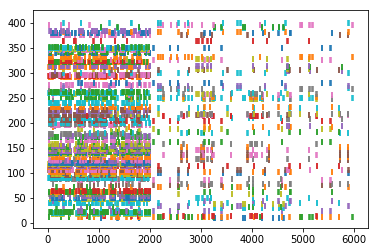

In [5]:


# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)
#tstop = 100
spike_trains = []

ass = mdf1.analogsignals[0]   
tstop = mdf1.t_stop

vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,tstop))
    spike_trains.append(pspikes)

# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()



plot the analog signal Block/Segment to get information about its length and sampling rate


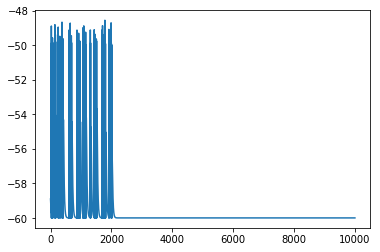

In [6]:
print('plot the analog signal Block/Segment to get information about its length and sampling rate')
#print(mdf1.analogsignals)
#ass = mdf1.analogsignals[0][225]   
with open('membrane_dynamics_balanced_file.p', 'rb') as f:
  mdf1 = pickle.load(f)

vm = mdf1.take_slice_of_analogsignalarray_by_channelindex(225)[0]
from neuronunit.models import static_model
#print(type(ass))
sm = static_model.StaticModel(vm = vm, st = mdf1.spiketrains[225])
#import pdb#
#pdb.set_trace()

#sf = 10 * 1/0.001
#dt = float(1.0/sf)
#times = np.arange(0.0,float(len(vm)),1)

plt.figure()
plt.plot(vm.times, vm)
plt.show()


with open('membrane_dynamics_balanced_file.p', 'rb') as f:
  mdf1 = pickle.load(f)

In [7]:

'''

#dt = 0.01 # 1 ms interval between points
T_max = len(vm_spiking[144]) # Signal lasts for 10 seconds
times = np.arange(0,T_max,dt)
N = len(times)
frequency = 20 # Frequency of sinusoid in Hz
offset = 0 # Phase offset in radians
lv_test_signal0 = np.array(0.6*np.sin(2*np.pi*frequency*times+offset))
lv_test_signal1 = np.array(0.6*np.sin(2*np.pi*2*frequency*times+offset))

composite_signal = [ float(vm) + lv_test_signal0[i] for i,vm in enumerate(vm_spiking[144])]
'''

'\n\n#dt = 0.01 # 1 ms interval between points\nT_max = len(vm_spiking[144]) # Signal lasts for 10 seconds\ntimes = np.arange(0,T_max,dt)\nN = len(times)\nfrequency = 20 # Frequency of sinusoid in Hz\noffset = 0 # Phase offset in radians\nlv_test_signal0 = np.array(0.6*np.sin(2*np.pi*frequency*times+offset))\nlv_test_signal1 = np.array(0.6*np.sin(2*np.pi*2*frequency*times+offset))\n\ncomposite_signal = [ float(vm) + lv_test_signal0[i] for i,vm in enumerate(vm_spiking[144])]\n'

In [12]:

from neuronunit.tests.dynamics import CVTest, LocalVariationTest, FiringRateTest
from neuronunit.tests import fi, dynamics, waveform, passive

cholinergic = {'neuron':115}

test_class_params = [ dynamics.CVTest,
                      dynamics.ISITest,
                      waveform.APAmplitudeTest,
                      waveform.APWidthTest, 
                      passive.TimeConstantTest
                    ]

# observations 
# amplitude 45.1 mV +-0.7mV
# spike width, 19.7 +-1ms
# 
# rise time 81.2 +-4.6mS
# , decay time,15.1+-1.1mV
# AHP amplitude, 7.3+-0.3mV
# observation ISI width 598.0+-37 ms error
# len()

def run_test(test):
    from neuronunit.optimization import get_neab
    from neuronunit.models.reduced import ReducedModel
    from neuronunit.tests import base
    import sciunit
    from neuronunit.models import static_model
    #vm = mdf1.take_slice_of_analogsignalarray_by_channelindex(225)
    vm = mdf1.take_slice_of_analogsignalarray_by_channelindex(225)[0]
    print(vm.times)

    model = static_model.StaticModel(vm = vm ,st = mdf1.spiketrains[225], name='vanilla_from_pickle')
    mp = model.get_membrane_potential()
    print(model.get_AP_amplitudes())
    print(model.get_AP_thresholds())
    #import pdb
    #pdb.set_trace()
    score = test.judge(model, stop_on_error = False, deep_error = True)

    return score
for i,t in enumerate(test_class_params):
    import quantities as pq

    print(i)
    if i==0:    
        observation = {}
        observation['cv'] = 0.21*pq.dimensionless  # retest at mean value 0.0.210526
        observation['mode'] = 0.74*pq.dimensionless  # retest at mode value 0.736842

    elif i==1:
        observation = {}
        observation['isi'] = 598.0*pq.ms
        observation['isi_mean'] = 598.0*pq.ms
        observation['isi_std'] = 37.0*pq.ms

    elif i==2:
        observation = {}
        observation['amplitude'] = 45.1*pq.mV    
    
    elif i==3:
        observation = {}
        observation['width'] = 19.7*pq.ms    

    elif i==4:
        observation = {}
        observation['time_constant'] = 15.1*pq.mV   
    

        
    test = t(observation=observation)

    score = run_test(test)#,pred=prediction_wave)
    print(score,'score')


0
[  0.00000000e+00   1.00000000e-01   2.00000000e-01 ...,   9.99980000e+03
   9.99990000e+03   1.00000000e+04] ms
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getslice__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos_

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
plt.figure()
plt.plot(x, np.abs(y), '--k', label="ISI-profile")
print("ISI-distance: %.8f" % f.avrg())
f = spk.spike_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', label="SPIKE-profile")
print("SPIKE-distance: %.8f" % f.avrg())
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.figure()

f = spk.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()
plt.plot(x, y, '--ok', label="SPIKE-SYNC profile")
#print(f.x)
#print(f.y)
#print(f.mp)

print("Average:", f.avrg())


f = spk.spike_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()

plt.plot(x, y, '-b', label="SPIKE-profile")

plt.axis([0, 4000, -0.1, 1.1])
plt.legend(loc="center right")

plt.figure()

plt.subplot(211)

f = spk.spike_sync_profile(spike_trains)
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', alpha=0.7, label="SPIKE-Sync profile")

x1, y1 = f.get_plottable_data(averaging_window_size=50)
plt.plot(x1, y1, '-k', lw=2.5, label="averaged SPIKE-Sync profile")

plt.subplot(212)

f_psth = spk.psth(spike_trains, bin_size=50.0)
x, y = f_psth.get_plottable_data()
plt.plot(x, y, '-k', alpha=1.0, label="PSTH")


print("Average:", f.avrg())

plt.show()

In [ ]:

#print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

In [ ]:


plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")
plt.show()

In [ ]:

plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_sync, interpolation='none')
plt.title("SPIKE-Sync, T=2000-4000")
plt.show()